#### Round 1 - Success = IPO vs Rest

In [1]:
#Importing required libraries
import os
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
import random
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Importing data
data = pd.read_excel('mydata_model_round1_V2.xlsx')
print(data.shape)
data.head(2)

(1932, 29)


,d_success,Total Number of Rounds,Total Amount Raised ($M),Unique Amount Raised ($M),Meta Category,Highest Amount Raised ($M),Years in operation,Angel_round,Convertible Note_round,Continent,Largest Funding Round,Total Number of Investors,Last Round,Corporate Round_round,Debt Financing_round,Equity Crowdfunding_round,Grant_round,Initial Coin Offering_round,Late Stage_round,Non Equity Assistance_round,Pre Seed_round,Private Equity_round,Product Crowdfunding_round,Secondary Market_round,Seed_round,Series A_round,Series B_round,Series C_round,Venture_round
0,0,2,267.152423,267.152423,Deposits and Lending,159.356632,5,0,0,Asia,Series C,6,Series C,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,2,158.731418,158.731418,Deposits and Lending,158.731418,15,0,0,Europe,Debt Financing,2,Debt,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
data.isnull().sum()

##### Imputing missing values

In [3]:
#Imputing the missing value in the variable 'Last Round'
data['Last Round'].fillna('Data NA', inplace=True)

In [ ]:
#Replacing the -ve values with 0 based in assumptions that the company got the investment on the founding day
# data['Angel_days'] = np.where(data['Angel_days']<0, 0, data['Angel_days'])
# data['Convertible Note_days'] = np.where(data['Convertible Note_days']<0, 0, data['Convertible Note_days'])
# data['Corporate Round_days'] = np.where(data['Corporate Round_days']<0, 0, data['Corporate Round_days'])
# data['Debt Financing_days'] = np.where(data['Debt Financing_days']<0, 0, data['Debt Financing_days'])
# data['Equity Crowdfunding_days'] = np.where(data['Equity Crowdfunding_days']<0, 0, data['Equity Crowdfunding_days'])
# data['Grant_days'] = np.where(data['Grant_days']<0, 0, data['Grant_days'])
# data['Initial Coin Offering_days'] = np.where(data['Initial Coin Offering_days']<0, 0, data['Initial Coin Offering_days'])
# data['Late Stage_days'] = np.where(data['Late Stage_days']<0, 0, data['Late Stage_days'])
# data['Non Equity Assistance_days'] = np.where(data['Non Equity Assistance_days']<0, 0, data['Non Equity Assistance_days'])
# data['Post Ipo Debt_days'] = np.where(data['Post Ipo Debt_days']<0, 0, data['Post Ipo Debt_days'])
# data['Post Ipo Equity_days'] = np.where(data['Post Ipo Equity_days']<0, 0, data['Post Ipo Equity_days'])
# data['Pre Seed_days'] = np.where(data['Pre Seed_days']<0, 0, data['Pre Seed_days'])
# data['Private Equity_days'] = np.where(data['Private Equity_days']<0, 0, data['Private Equity_days'])
# data['Product Crowdfunding_days'] = np.where(data['Product Crowdfunding_days']<0, 0, data['Product Crowdfunding_days'])
# data['Secondary Market_days'] = np.where(data['Secondary Market_days']<0, 0, data['Secondary Market_days'])
# data['Seed_days'] = np.where(data['Seed_days']<0, 0, data['Seed_days'])
# data['Series A_days'] = np.where(data['Series A_days']<0, 0, data['Series A_days'])
# data['Series B_days'] = np.where(data['Series B_days']<0, 0, data['Series B_days'])
# data['Series C_days'] = np.where(data['Series C_days']<0, 0, data['Series C_days'])
# data['Undisclosed_days'] = np.where(data['Undisclosed_days']<0, 0, data['Undisclosed_days'])
# data['Venture_days'] = np.where(data['Venture_days']<0, 0, data['Venture_days'])

In [ ]:
#Imputing the missing value in the rounds_days variable as -1 (Not applicable)
#data.fillna(-1, inplace=True)
# data.fillna(-1, inplace=True)

In [ ]:
data.isnull().sum()

In [4]:
print(data['d_success'].value_counts())
print("\n")

suc=len(data[data['d_success']==1])
fail=len(data[data['d_success']==0])
tot=suc+fail

print("% of success {}%".format(round(suc/tot*100,2)))
print("% of failure {}%".format(round(fail/tot*100,2)))

0    1895
1      37
Name: d_success, dtype: int64


% of success 1.92%
% of failure 98.08%


We know that not getting success is more common than getting the success.  Hence, in this case we will predict that all the companies are unsuccessful. By doing this, we would get 1867/1932 observations correct and an accuracy of 96.64%. So our baseline model has an accuracy of 96.64%.This is what we’ll try to beat with our logistic regression model.

In [ ]:
data.dtypes

#### Create dummy variables

In [5]:
cat_vars = data.select_dtypes(include=['object']).columns.tolist()
#cat_vars.remove('Company')
cat_vars

['Meta Category', 'Continent', 'Largest Funding Round', 'Last Round']

In [6]:
#Creating dummies for categorical variables
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [7]:
print(data.shape)
data.head()

(1932, 78)


,d_success,Total Number of Rounds,Total Amount Raised ($M),Unique Amount Raised ($M),Meta Category,Highest Amount Raised ($M),Years in operation,Angel_round,Convertible Note_round,Continent,Largest Funding Round,Total Number of Investors,Last Round,Corporate Round_round,Debt Financing_round,Equity Crowdfunding_round,Grant_round,Initial Coin Offering_round,Late Stage_round,Non Equity Assistance_round,Pre Seed_round,Private Equity_round,Product Crowdfunding_round,Secondary Market_round,Seed_round,Series A_round,Series B_round,Series C_round,Venture_round,Meta Category_Banking Operations,Meta Category_Capital Raising,Meta Category_Deposits and Lending,Meta Category_Financial Management,Meta Category_Payments,Continent_Africa,Continent_Asia,Continent_Australia/New Zealand,Continent_Data unavailable,Continent_Europe,Continent_North America,Continent_South America,Largest Funding Round_Angel,Largest Funding Round_Convertible Note,Largest Funding Round_Corporate Round,Largest Funding Round_Debt Financing,Largest Funding Round_Equity Crowdfunding,Largest Funding Round_Grant,Largest Funding Round_Initial Coin Offering,Largest Funding Round_Late Stage,Largest Funding Round_Non Equity Assistance,Largest Funding Round_Post Ipo Debt,Largest Funding Round_Post Ipo Equity,Largest Funding Round_Pre Seed,Largest Funding Round_Private Equity,Largest Funding Round_Product Crowdfunding,Largest Funding Round_Secondary Market,Largest Funding Round_Seed,Largest Funding Round_Series A,Largest Funding Round_Series B,Largest Funding Round_Series C,Largest Funding Round_Undisclosed,Largest Funding Round_Venture,Last Round_Angel,Last Round_Data NA,Last Round_Debt,Last Round_Grant,Last Round_PE,Last Round_Post IPO Equity,Last Round_Secondary,Last Round_Seed,Last Round_Series A,Last Round_Series B,Last Round_Series C,Last Round_Series D,Last Round_Series E,Last Round_Series F,Last Round_Series G,Last Round_Venture
0,0,2,267.152423,267.152423,Deposits and Lending,159.356632,5,0,0,Asia,Series C,6,Series C,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,2,158.731418,158.731418,Deposits and Lending,158.731418,15,0,0,Europe,Debt Financing,2,Debt,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0.354439,0.354439,Capital Raising,0.354439,4,0,0,Europe,Seed,1,Seed,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0.000000,0.000000,Financial Management,0.000000,7,0,0,Africa,Undisclosed,0,Data NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,18.000000,18.000000,Payments,8.000000,16,0,0,Asia,Late Stage,3,Series D,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
#Dropping the original categorical variables after creating the dummies
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep

['d_success',
 'Total Number of Rounds',
 'Total Amount Raised ($M)',
 'Unique Amount Raised ($M)',
 'Highest Amount Raised ($M)',
 'Years in operation',
 'Angel_round',
 'Convertible Note_round',
 'Total Number of Investors',
 'Corporate Round_round',
 'Debt Financing_round',
 'Equity Crowdfunding_round',
 'Grant_round',
 'Initial Coin Offering_round',
 'Late Stage_round',
 'Non Equity Assistance_round',
 'Pre Seed_round',
 'Private Equity_round',
 'Product Crowdfunding_round',
 'Secondary Market_round',
 'Seed_round',
 'Series A_round',
 'Series B_round',
 'Series C_round',
 'Venture_round',
 'Meta Category_Banking Operations',
 'Meta Category_Capital Raising',
 'Meta Category_Deposits and Lending',
 'Meta Category_Financial Management',
 'Meta Category_Payments',
 'Continent_Africa',
 'Continent_Asia',
 'Continent_Australia/New Zealand',
 'Continent_Data unavailable',
 'Continent_Europe',
 'Continent_North America',
 'Continent_South America',
 'Largest Funding Round_Angel',
 'Large

In [9]:
#Final data columns
data_final=data[to_keep]
data_final.columns.values

array(['d_success', 'Total Number of Rounds', 'Total Amount Raised ($M)',
       'Unique Amount Raised ($M)', 'Highest Amount Raised ($M)',
       'Years in operation', 'Angel_round', 'Convertible Note_round',
       'Total Number of Investors', 'Corporate Round_round',
       'Debt Financing_round', 'Equity Crowdfunding_round', 'Grant_round',
       'Initial Coin Offering_round', 'Late Stage_round',
       'Non Equity Assistance_round', 'Pre Seed_round',
       'Private Equity_round', 'Product Crowdfunding_round',
       'Secondary Market_round', 'Seed_round', 'Series A_round',
       'Series B_round', 'Series C_round', 'Venture_round',
       'Meta Category_Banking Operations',
       'Meta Category_Capital Raising',
       'Meta Category_Deposits and Lending',
       'Meta Category_Financial Management', 'Meta Category_Payments',
       'Continent_Africa', 'Continent_Asia',
       'Continent_Australia/New Zealand', 'Continent_Data unavailable',
       'Continent_Europe', 'Continent_

In [10]:
# Dropping 'Largest Funding Round_Undisclosed' and 'Last Round_Data NA'
data_final = data_final.drop(['Largest Funding Round_Undisclosed','Last Round_Data NA', 'Continent_Data unavailable'], axis=1)
data_final.shape

(1932, 71)

In [11]:
#Separating predictors and target variable
predictors=data_final.drop('d_success', axis=1)
target=data_final[['d_success']]

In [ ]:
# # Pick only numeric variables to rescale
# predictors_num = predictors[list(set(pd.Series(['Total Number of Rounds', 'Total Amount Raised ($M)', 'Unique Amount Raised ($M)',
#                      'Highest Amount Raised ($M)', 'Years in operation'])))]
# predictors_non_num = predictors[list(set(predictors.columns)-set(predictors_num))]
# print(predictors_num.shape, predictors_non_num.shape)

### Rescaling the data as the variables are on different scale

1. If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions. We can overcome this trouble using feature scaling.
2. It should be kept in mind while performing distance based methods we must attempt to scale the data, so that the feature with lesser significance might not end up dominating the objective function due to its larger range. In addition, features having different unit should also be scaled thus providing each feature equal initial weightage and at the end we will have a better prediction model.

In [12]:
# MinMaxScaler that will scale down all the features between 0 and 1.

from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# predictors_num_rescaled = pd.DataFrame(min_max.fit_transform(predictors_num), columns=predictors_num.columns)
# X_rescaled = predictors_num_rescaled.join(predictors_non_num)

X_rescaled = pd.DataFrame(min_max.fit_transform(predictors), columns=predictors.columns)
# X_rescaled

### Feature Standardization

1. In logistic regression, each feature is assigned a weight or coefficient (Wi). If there is a feature with relatively large range and it is insignificant in the objective function then logistic regression will itself assign a very low value to its co-efficient, thus neutralizing the dominant effect of that particular feature, whereas distance based method such as kNN does not have this inbuilt strategy, thus it requires scaling.
2. Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.
3. Elements such as l1 ,l2 regularizer in linear models (logistic comes under this category) and RBF kernel in SVM in objective function of learners assumes that all the features are centered around zero and have variance in the same order.
4. Standardizing the data when using a estimator having l1 or l2 regularization helps us to increase the accuracy of the prediction model. Other learners like kNN with euclidean distance measure, k-means, SVM, perceptron, neural networks, linear discriminant analysis, principal component analysis may perform better with standardized data.

In [13]:
# Standardizing the data

from sklearn.preprocessing import scale

# predictors_num_std = pd.DataFrame(scale(predictors_num), columns=predictors_num.columns)
# X_standardized = predictors_num_std.join(predictors_non_num)

X_standardized = pd.DataFrame(scale(predictors), columns=predictors.columns)
# X_standardized

### 2. Over-sampling using SMOTE

###### At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (Non-IPO) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [14]:
import warnings
warnings.filterwarnings("ignore")

# X1 = data_final.loc[:, data_final.columns != 'd_success']
# y1 = data_final.loc[:, data_final.columns == 'd_success']

#### Select X1 based on the required; y1 will be common for any X1 ###
# X1=predictors
# X1=X_standardized
X1=X_rescaled
y1=target

os = SMOTE(k_neighbors=5, random_state=999) # we can use different values of k

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=999)

columns = X_train1.columns
os_data_X,os_data_y=os.fit_sample(X_train1, y_train1)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['d_success'])

# we can Check the numbers of our data
print("length of original data is: ",len(X_train1))
print("Number of Non-IPO in oversampled data: ",len(y_train1[y_train1['d_success']==0]))
print("Number of IPO data in oversampled data: ",len(y_train1[y_train1['d_success']==1]))
print("Proportion of Non-IPO data in original data is: ",round(len(y_train1[y_train1['d_success']==0])/len(X_train1),2))
print("Proportion of IPO data in original data is: ",round(len(y_train1[y_train1['d_success']==1])/len(X_train1),2))

print("\n")

print("length of oversampled data is: ",len(os_data_X))
print("Number of Non-IPO in oversampled data: ",len(os_data_y[os_data_y['d_success']==0]))
print("Number of IPO data in oversampled data: ",len(os_data_y[os_data_y['d_success']==1]))
print("Proportion of Non-IPO data in oversampled data is: ",len(os_data_y[os_data_y['d_success']==0])/len(os_data_X))
print("Proportion of IPO data in oversampled data is: ",len(os_data_y[os_data_y['d_success']==1])/len(os_data_X))

length of original data is:  1352
Number of Non-IPO in oversampled data:  1327
Number of IPO data in oversampled data:  25
Proportion of Non-IPO data in original data is:  0.98
Proportion of IPO data in original data is:  0.02


length of oversampled data is:  2654
Number of Non-IPO in oversampled data:  1327
Number of IPO data in oversampled data:  1327
Proportion of Non-IPO data in oversampled data is:  0.5
Proportion of IPO data in oversampled data is:  0.5


### GridSearchCV evaluating using multiple scorers simultaneously

Result on Rescaled data
best params: LogisticRegression(C=1.80001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=999,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 1.80001}
best score: 0.984472049689441


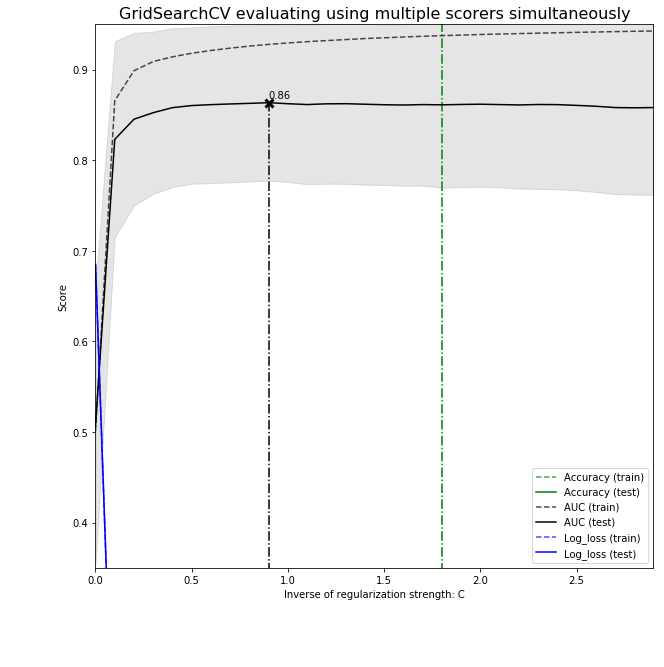

Result on oversampled data
best params: LogisticRegression(C=2.8000100000000003, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=999,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 2.8000100000000003}
best score: 0.9397136397889977


In [15]:
from sklearn.model_selection import GridSearchCV

# X = data_final[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(random_state=999), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

# gs.fit(predictors, target)
# gs.fit(X_standardized, target)
gs.fit(X_rescaled, target)

#### Result on Rescaled data

print("Result on Rescaled data")

results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

# #### Result on oversampled data

print("Result on oversampled data")

gs1 = GridSearchCV(LogisticRegression(random_state=999), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')
gs1.fit(os_data_X, os_data_y)

results = gs1.cv_results_

print('='*20)
print("best params: " + str(gs1.best_estimator_))
print("best params: " + str(gs1.best_params_))
print('best score:', gs1.best_score_)
print('='*20)

# Logistic Regression and Results

### 1. Feature selection

##### 1.1 Feature ranking with recursive feature elimination and cross-validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features with original predictors: 16
Selected features with original predictors: ['Total Amount Raised ($M)', 'Unique Amount Raised ($M)', 'Years in operation', 'Grant_round', 'Secondary Market_round', 'Series C_round', 'Meta Category_Deposits and Lending', 'Largest Funding Round_Late Stage', 'Largest Funding Round_Post Ipo Debt', 'Largest Funding Round_Post Ipo Equity', 'Largest Funding Round_Private Equity', 'Largest Funding Round_Series C', 'Last Round_PE', 'Last Round_Secondary', 'Last Round_Seed', 'Last Round_Series E']


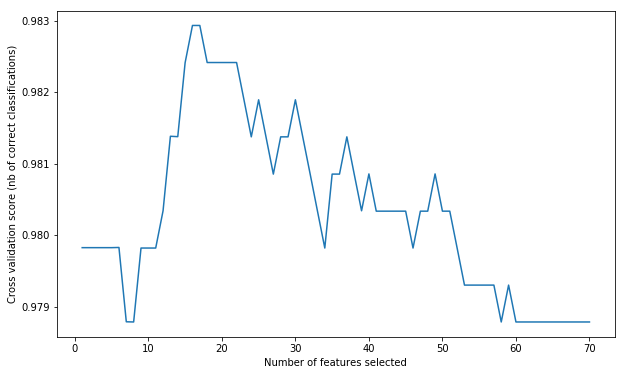

Optimal number of features with rescaled predictors: 16
Selected features with rescaled predictors: ['Total Amount Raised ($M)', 'Unique Amount Raised ($M)', 'Years in operation', 'Grant_round', 'Secondary Market_round', 'Series C_round', 'Meta Category_Deposits and Lending', 'Largest Funding Round_Late Stage', 'Largest Funding Round_Post Ipo Debt', 'Largest Funding Round_Post Ipo Equity', 'Largest Funding Round_Private Equity', 'Largest Funding Round_Series C', 'Last Round_PE', 'Last Round_Secondary', 'Last Round_Seed', 'Last Round_Series E']


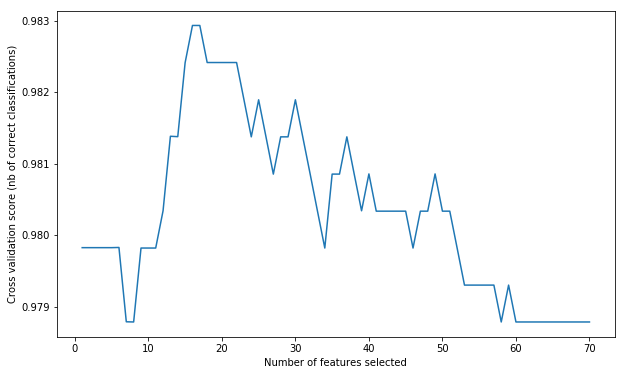

Optimal number of features with standardized predictors: 16
Selected features with standardized predictors: ['Total Amount Raised ($M)', 'Unique Amount Raised ($M)', 'Years in operation', 'Grant_round', 'Secondary Market_round', 'Series C_round', 'Meta Category_Deposits and Lending', 'Largest Funding Round_Late Stage', 'Largest Funding Round_Post Ipo Debt', 'Largest Funding Round_Post Ipo Equity', 'Largest Funding Round_Private Equity', 'Largest Funding Round_Series C', 'Last Round_PE', 'Last Round_Secondary', 'Last Round_Seed', 'Last Round_Series E']


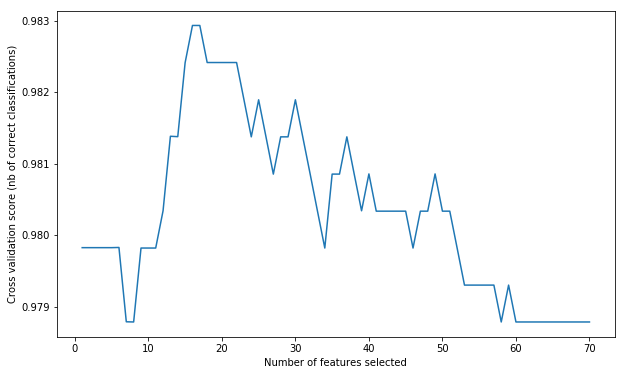

Optimal number of features with oversampled predictors: 59
Selected features with oversampled predictors: ['Total Number of Rounds', 'Years in operation', 'Angel_round', 'Convertible Note_round', 'Total Number of Investors', 'Corporate Round_round', 'Debt Financing_round', 'Equity Crowdfunding_round', 'Grant_round', 'Initial Coin Offering_round', 'Late Stage_round', 'Non Equity Assistance_round', 'Pre Seed_round', 'Private Equity_round', 'Product Crowdfunding_round', 'Secondary Market_round', 'Seed_round', 'Series A_round', 'Series B_round', 'Series C_round', 'Venture_round', 'Meta Category_Financial Management', 'Meta Category_Payments', 'Continent_Africa', 'Continent_Asia', 'Continent_Australia/New Zealand', 'Continent_Europe', 'Continent_North America', 'Continent_South America', 'Largest Funding Round_Angel', 'Largest Funding Round_Debt Financing', 'Largest Funding Round_Equity Crowdfunding', 'Largest Funding Round_Grant', 'Largest Funding Round_Initial Coin Offering', 'Largest Fun

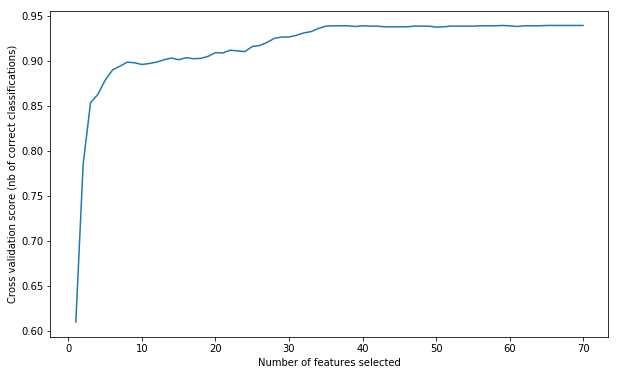

In [16]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(C=1.80001, penalty='l2'), step=1, cv=10, scoring='accuracy') # For rescaled 
# rfecv = RFECV(estimator=LogisticRegression(C=2.7000100000000002, penalty='l2'), step=1, cv=10, scoring='accuracy') # For oversampled
rfecv1 = rfecv.fit(predictors, target)
rfecv2 = rfecv.fit(X_rescaled, target)
rfecv3 = rfecv.fit(X_standardized, target)

# # On Oversampled Data
rfecvOS = RFECV(estimator=LogisticRegression(C=2.8000100000000003, penalty='l2'), step=1, cv=10, scoring='accuracy')
rfecv4 = rfecvOS.fit(os_data_X, os_data_y) # On Oversampled data

####### With Original predictors value #########
print("Optimal number of features with original predictors: %d" % rfecv1.n_features_)
print('Selected features with original predictors: %s' % list(predictors.columns[rfecv1.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_)
plt.show()

####### With rescaled predictors value #########
print("Optimal number of features with rescaled predictors: %d" % rfecv2.n_features_)
print('Selected features with rescaled predictors: %s' % list(X_rescaled.columns[rfecv2.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv2.grid_scores_) + 1), rfecv2.grid_scores_)
plt.show()
# plt.savefig('RFECV.png')

####### With standardized predictors value #########
print("Optimal number of features with standardized predictors: %d" % rfecv3.n_features_)
print('Selected features with standardized predictors: %s' % list(X_standardized.columns[rfecv3.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv3.grid_scores_) + 1), rfecv3.grid_scores_)
plt.show()


# ####### With oversampled data #########
print("Optimal number of features with oversampled predictors: %d" % rfecv4.n_features_)
print('Selected features with oversampled predictors: %s' % list(os_data_X.columns[rfecv4.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv4.grid_scores_) + 1), rfecv4.grid_scores_)
plt.show()

##### 1.2 Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE

# Build a logreg and compute the feature importances
model = LogisticRegression(C=1.80001) #Change the value of 'C' based on the best parameters that we get from GridSearch CV

# create the RFE model and select 18 attributes
rfe = RFE(model, 15)
rfe1 = rfe.fit(predictors, target)
rfe2 = rfe.fit(X_rescaled, target)
rfe3 = rfe.fit(X_standardized, target)

# summarize the selection of the attributes
print('Selected features with original data: %s\n' % list(predictors.columns[rfe1.support_]))
print('Selected features with rescaled data: %s\n' % list(X_rescaled.columns[rfe2.support_]))
print('Selected features with standardized data: %s' % list(X_standardized.columns[rfe3.support_]))

# For oversampled data
modelOS = LogisticRegression(C=2.8000100000000003)
rfeOS = RFE(modelOS, 15)

print('Selected features with oversampled data: %s' % list(os_data_X.columns[rfeOS.support_]))

In [ ]:
# # Correlation with original predictors value

# #Features suggested by Logistics Regression
# selected_features = ['Years in operation', 'Post Ipo Debt_round', 'Post Ipo Equity_round', 'Series A_round',
#                      'Series B_round', 'Venture_round', 'Post Ipo Debt_days', 'Seed_days', 'Series A_days',
#                      'Series B_days', 'Series C_days', 'Venture_days', 'Meta Category_Deposits and Lending',
#                      'Last Round_PE', 'Largest Funding Round_Late Stage', 'Largest Funding Round_Post Ipo Debt',
#                      'Largest Funding Round_Private Equity', 'Largest Funding Round_Series C']

# data_X = data_final[selected_features]

# # plt.rcParams['figure.figsize']=12,6
# plt.figure(figsize=(12, 6))
# sns.heatmap(data_X.corr(), annot=True, cmap="RdYlGn")
# plt.show()
# # fig.savefig('cor')

### 3. Review of model evaluation procedures

### Split the data into train and test

###### NOTE: Run the next next line of code only for the original and not the oversampled data models; otherwise skip the next line

In [17]:
#### Select X for splitting based on the requirement; y will be same for all

# X=X_standardized
X=X_rescaled
# X=predictors
y=target

# ## In case we want to run the model with few selected features based on RFE
# X=X_standardized[selected_features]
# X=X_rescaled[selected_features]
# X=predictors[selected_features]
# y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1352, 70) (1352, 1)
(580, 70) (580, 1)


###### Note: Run the next line of code only for the oversampled data models. For normal data models run the previous line of code

In [24]:
X_train = os_data_X
y_train = os_data_y
X_test = X_test1
y_test = y_test1

# ## In case we want to run the model with few selected features based on RFE
# X_train = os_data_X[selected_features]
# y_train = os_data_y
# X_test = X_test1[selected_features]
# y_test = y_test1

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2654, 70) (2654, 1)
(580, 70) (580, 1)


##### 3.1 Model evaluation based on simple train/test split

Result on train data:

LogisticRegression accuracy is 0.944
LogisticRegression log_loss is 0.160
LogisticRegression auc is 0.984


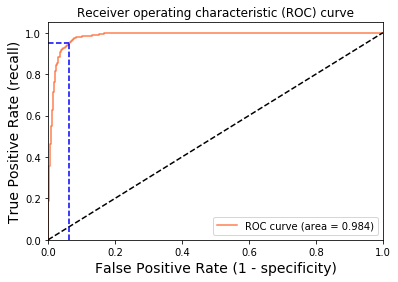

Result on validation/test data:

LogisticRegression accuracy is 0.910
LogisticRegression log_loss is 0.217
LogisticRegression auc is 0.807


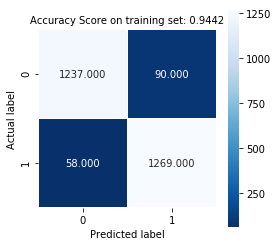

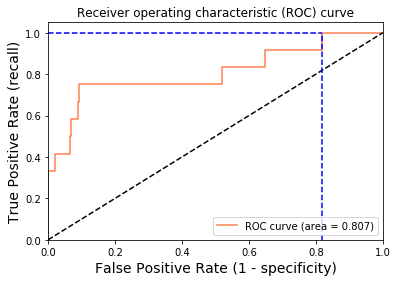

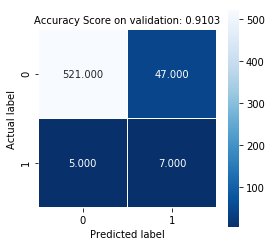

In [25]:
import random
random.seed(999)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# # create X (features) and y (response)
# X = data_final[Selected_features]
# y = data_final['d_success']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# check classification scores of logistic regression
logreg = LogisticRegression(C=2.8000100000000003)
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

y_pred_proba_train = logreg.predict_proba(X_train)[:, 1]
y_pred_proba = logreg.predict_proba(X_test)[:, 1]


print('Result on train data:\n')
[fpr, tpr, thr] = roc_curve(y_train, y_pred_proba_train)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_train, y_pred_train))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_train, y_pred_proba_train))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on train data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_train, y_pred_train)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on training set: {0}'.format(round(accuracy_score(y_train, y_pred_train),4))
plt.title(all_sample_title, size = 10)


#################### Test/Validation ######################

print("Result on validation/test data:\n")
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

idx1 = np.min(np.where(tpr1 > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr1, tpr1, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr1[idx1]], [tpr1[idx1],tpr1[idx1]], 'k--', color='blue')
plt.plot([fpr1[idx1],fpr1[idx1]], [0,tpr1[idx1]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on test data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on validation: {0}'.format(round(accuracy_score(y_test, y_pred),4))
plt.title(all_sample_title, size = 10);


# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# #Optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# print("\nOptimal Threshold:%.3f" % thr[optimal_idx])

Final output: Logistic regression with oversampled values is giving better sensitivity 

### Using Statsmodel

In [ ]:
import statsmodels.api as sm

# ols_model=sm.Logit(target,predictors)
ols_model=sm.Logit(target,X_rescaled)
# ols_model=sm.Logit(target,X_standardized)
# ols_model=sm.Logit(os_data_y,os_data_X)

In [ ]:
result=ols_model.fit(maxiter=15000)
result.summary()

###### There are two possibilities

1) difficult optimization problem: Usually Logit converges very fast and the default number of iteration is set very low. Adding a larger maxiter keyword in the call to fit or refitting with the previous result as start_params helps in most cases.

2) Since this is Logit, it is possible that there is complete separation, or quasi-complete separation. In this case some parameters might go off to infinity and the optimization stops at some convergence or stopping criterion. Logit detect the simple case of full separation and raises an exception, but there could be partial separation that is not detected. With perfect separation you get perfect predictability for some or all cases, which is useful for prediction but causes problems in estimating and identifying the parameters. More information is for example here https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression There are also several FAQ issues on the statsmodels github issues for corner cases and problems like this.

In [ ]:
y_pred = result.predict(X_test)

In [ ]:
#Print the summary to csv
f = open('out.csv','w')
f.write(result.summary().as_csv())
f.close()

##### Imp Note:
    
The parameter estimates from the scikit-learn estimation are uniformly smaller in magnitude than the statsmodels counterpart. This is because the scikit-learn applies some kind of parameter regularization.

There is no way to switch off regularization in scikit-learn, but you can make it ineffective by setting the tuning parameter C to a large number.

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=999)

In [26]:
# GridSearchCV to fine tune the parameters
np.random.seed(999)
start = time.time()

param_dist = {'max_depth':[6, 7, 8, 9, 10,11,12,14,16, 17, 18],
              'bootstrap':[True, False],
              'max_features':['auto', 'sqrt', 'log2', None],              
              'min_samples_split': [2, 3, 4,5,6],
              'class_weight' : [None, 'balanced_subsample', 'balanced']
             }

cv_rf = GridSearchCV(forest, cv=10, param_grid=param_dist, n_jobs=-1)
# cv_rf.fit(os_data_X, os_data_y)
cv_rf.fit(X_train, y_train)
print('Best parameters using grid search: \n',
       cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end-start))

Best parameters using grid search: 
 {'bootstrap': False, 'class_weight': None, 'max_depth': 18, 'max_features': 'log2', 'min_samples_split': 3}
Time taken in grid search:  341.94


Result on train data:

RandomForestClassifier accuracy is 1.000
RandomForestClassifier log_loss is 0.006
RandomForestClassifier auc is 1.000


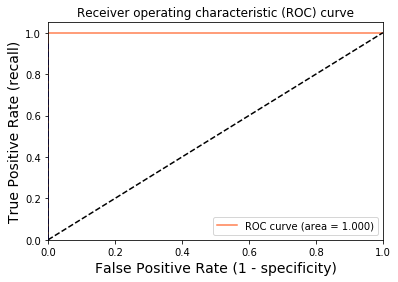

Result on validation/test data:

RandomForestClassifier accuracy is 0.978
RandomForestClassifier log_loss is 0.343
RandomForestClassifier auc is 0.716


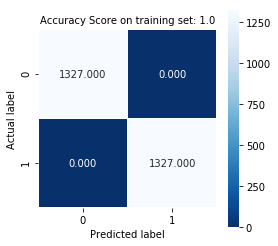

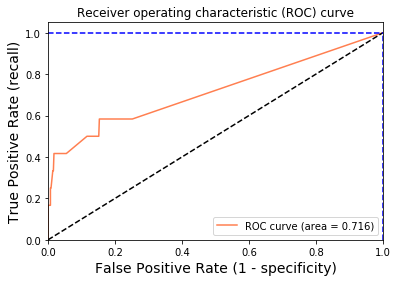

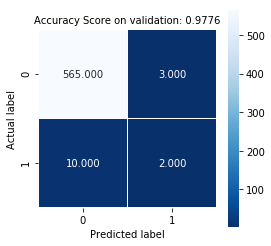

In [30]:
import random
random.seed(999)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# check classification scores of random forest
modelRF = forest.set_params(bootstrap=False, max_features='log2', max_depth=18,
                            n_estimators='warn', min_samples_split=3)
modelRF.fit(X_train, y_train)

y_pred_train = modelRF.predict(X_train)
y_pred = modelRF.predict(X_test)

y_pred_proba_train = modelRF.predict_proba(X_train)[:, 1]
y_pred_proba = modelRF.predict_proba(X_test)[:, 1]


print('Result on train data:\n')
[fpr, tpr, thr] = roc_curve(y_train, y_pred_proba_train)
print(modelRF.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_train, y_pred_train))
print(modelRF.__class__.__name__+" log_loss is %2.3f" % log_loss(y_train, y_pred_proba_train))
print(modelRF.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on train data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_train, y_pred_train)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on training set: {0}'.format(round(accuracy_score(y_train, y_pred_train),4))
plt.title(all_sample_title, size = 10)


#################### Test/Validation ######################

print("Result on validation/test data:\n")
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)
print(modelRF.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(modelRF.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(modelRF.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

idx1 = np.min(np.where(tpr1 > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure(figsize=(6,4))
plt.plot(fpr1, tpr1, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr1[idx1]], [tpr1[idx1],tpr1[idx1]], 'k--', color='blue')
plt.plot([fpr1[idx1],fpr1[idx1]], [0,tpr1[idx1]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on test data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on validation: {0}'.format(round(accuracy_score(y_test, y_pred),4))
plt.title(all_sample_title, size = 10);


# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# #Optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# print("\nOptimal Threshold:%.3f" % thr[optimal_idx])

In [ ]:
#Function to calculate the variable importance
features = X_train.columns
importances_rf = modelRF.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

def variable_importance(importance, indices):
    print("Feature ranking:")
    for f in range(len(features)):
        i = f
        print("%d. The feature '%s' has a Mean Decrease in Gini of %f" % (f + 1,features[indices[i]],importance[indices[f]]))
        
variable_importance(importances_rf, indices_rf)

In [ ]:
#Plot the variable importance
features = X_train.columns
importances_rf = modelRF.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.rcParams['figure.figsize']=10,20
plt.title('Feature Importances')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

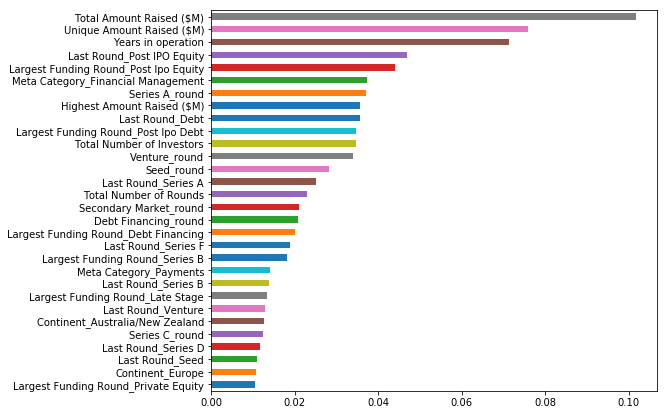

In [31]:
# Another way to plol top 15 features
plt.rcParams['figure.figsize']=8,7
feat_importances = pd.Series(modelRF.feature_importances_, index=X_train.columns)
lar15 = feat_importances.nlargest(30)
lar15.sort_values().plot(kind='barh');

##### Plotting the learning curve

In [ ]:
from sklearn.model_selection import learning_curve

# X=X_rescaled
# y=target

X=X_train
y=y_train

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(forest, 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
#GridSearchCV to fine tune the parameters
start = time.time()

param_dist1 = {#'max_depth':[8, 9, 10],
               #'min_child_weight':[5, 6, 7, 8],
               'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               #'gamma':[i/10.0 for i in range(0,5)],
               #'subsample':[i/10.0 for i in range(6,10)],
               #'colsample_bytree':[i/10.0 for i in range(6,10)],
               #'subsample':[i/100.0 for i in range(75,90,5)],
               #'colsample_bytree':[i/100.0 for i in range(75,90,5)],
               #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
               #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
                'learning_rate':[i/100.0 for i in range(1,20)]
             }

gridsearch1 = GridSearchCV(xgb.XGBClassifier(random_state=999), cv=10, param_grid=param_dist1, n_jobs=-1)
gridsearch1.fit(X_train, y_train)
print('Best parameters using grid search: \n',
       gridsearch1.best_params_, gridsearch1.best_score_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end-start))

In [ ]:
params = {'seed':224, 'n_estimators': 3000, 'max_depth': 7, 
        'learning_rate': 0.01, 'subsample': .8, 'min_child_weight': 1}
modelXGB = xgb.XGBClassifier(**params)

In [ ]:
import random
random.seed(999)

# check classification scores of random forest
modelXGB.fit(X_train, y_train)

y_pred_train = modelXGB.predict(X_train)
y_pred = modelXGB.predict(X_test)

y_pred_proba_train = modelXGB.predict_proba(X_train)[:, 1]
y_pred_proba = modelXGB.predict_proba(X_test)[:, 1]


print('Result on train data:\n')
[fpr, tpr, thr] = roc_curve(y_train, y_pred_proba_train)
print(modelXGB.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_train, y_pred_train))
print(modelXGB.__class__.__name__+" log_loss is %2.3f" % log_loss(y_train, y_pred_proba_train))
print(modelXGB.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on train data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_train, y_pred_train)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on training set: {0}'.format(round(accuracy_score(y_train, y_pred_train),4))
plt.title(all_sample_title, size = 10)


#################### Test/Validation ######################

print("Result on validation/test data:\n")
[fpr1, tpr1, thr1] = roc_curve(y_test, y_pred_proba)
print(modelXGB.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(modelXGB.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(modelXGB.__class__.__name__+" auc is %2.3f" % auc(fpr1, tpr1))

idx1 = np.min(np.where(tpr1 > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr1, tpr1, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr1[idx1]], [tpr1[idx1],tpr1[idx1]], 'k--', color='blue')
plt.plot([fpr1[idx1],fpr1[idx1]], [0,tpr1[idx1]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Confusion Matrix on test data
# print(logreg.__class__.__name__+" confusion matrix \n {}".format(confusion_matrix(y_test, y_pred)))

plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score on validation: {0}'.format(round(accuracy_score(y_test, y_pred),4))
plt.title(all_sample_title, size = 10);


# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

# #Optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# print("\nOptimal Threshold:%.3f" % thr[optimal_idx])